### Project - Term Deposit Subscription Prediction


Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


The historical data for this project is available in file  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Domain 
Banking & Marketing

#### Attribute information

Input variables:

Bank client 
data:

1. age:Continuous feature.
2. job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status(married, single, divorced)
4. education:education level (primary, secondary, tertiary)
5. default: has credit in default? 
6. housing: has housing loan? 
7. loan: has personal loan?
8. balance in account

#### Related to previous contact:

9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds

#### Other attributes:

13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaignOutput variable 

#### (desired target):

17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

### 1. Import the necessary packages

In [1]:
# Imporing the necessary Libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

####  1. Deliverable –1 (Exploratory data quality report)

Reading the dataset into dataframe 

In [4]:
# Univariate Analysis

DF = pd.read_csv('bank-full.csv')

Apply info, shape, describe, and find the number of missing values in the data

In [5]:
print(DF.info())
print()
print(DF.shape)
print()
print(DF.describe().T)
print()
print(DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

(45211, 17)

             count     mean      std       min    25%    50%      75%  \
age    

In [6]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [7]:
# Data Distribution Summary


# Age: mean is slightly higher than median...Q3 and Max differnece is very large compared to Q1 and Min difference...
# balance: data is skewed toward right side and might have upper side outliers
# day: median is slightly higher than mean.. Q3 and Max difference is slightly large compared to Q1 and Min difference...
# duaration data is skewed toward right side and might have upper side outliers
# campaign: data is skewed toward right side and might have upper side outliers
# pdays data is skewed toward right side and might have upper side outliers
# previous data is skewed toward right side and might have upper side outliers


In [8]:
# Checking the unique values in each column

print(DF.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001925CA59A48>,
      dtype=object)

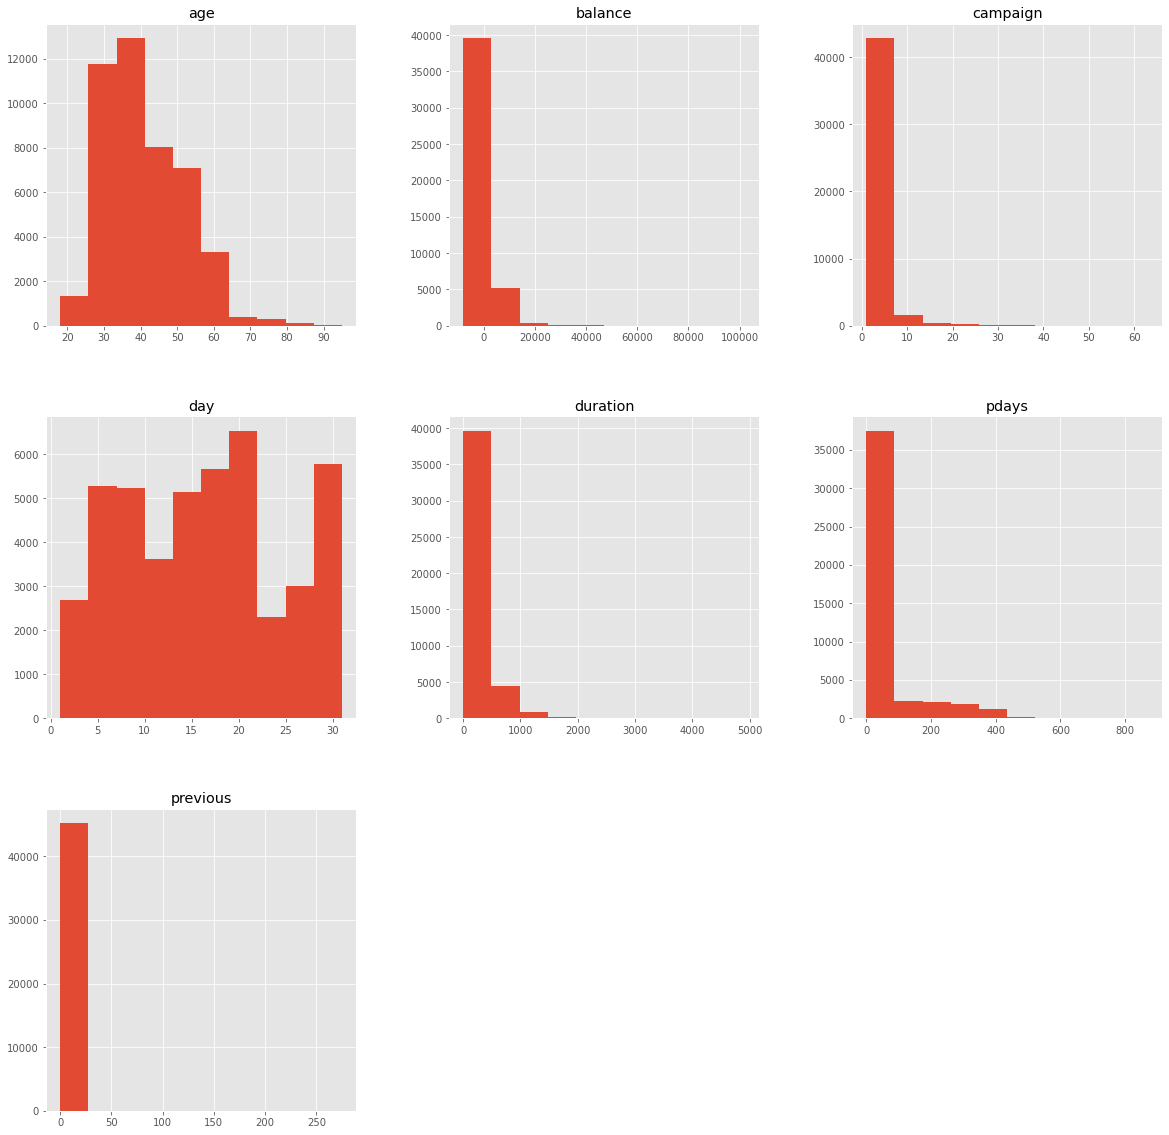

In [9]:
# performing univariant analysis by generating histogram of all dimensions
DF.hist(figsize = [20,20])

age            AxesSubplot(0.125,0.125;0.0945122x0.755)
balance     AxesSubplot(0.238415,0.125;0.0945122x0.755)
day         AxesSubplot(0.351829,0.125;0.0945122x0.755)
duration    AxesSubplot(0.465244,0.125;0.0945122x0.755)
campaign    AxesSubplot(0.578659,0.125;0.0945122x0.755)
pdays       AxesSubplot(0.692073,0.125;0.0945122x0.755)
previous    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

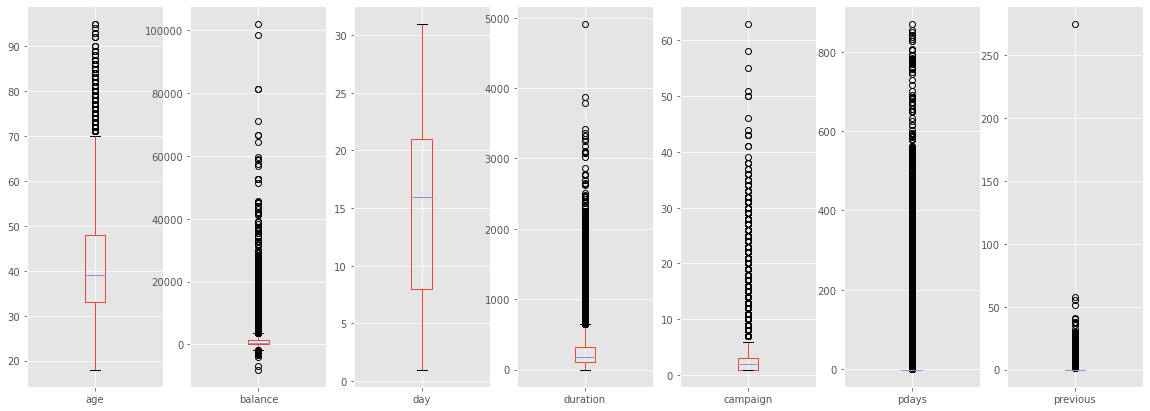

In [10]:
# plotting box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [11]:
#Outlier Treatment
# handling outlier for Mortgage feature
age_q3 = DF["age"].quantile(0.75)
age_q1 = DF["age"].quantile(0.25)
age_iqr = age_q3-age_q1 # find out iqr for Mortgage feature
print("age_iqr:",age_iqr)
upper_cutoff = age_q3+ 1.5*age_iqr
lower_cutoff = age_q1-1.5*age_iqr
print("age_upper cutoff:",upper_cutoff)
print("age_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for age feature
DF["age"] = DF["age"].where(DF["age"]<upper_cutoff,upper_cutoff)

# handling outlier for balance feature
balance_q3 = DF["balance"].quantile(0.75)
balance_q1 = DF["balance"].quantile(0.25)
balance_iqr = balance_q3-balance_q1 # find out iqr for Mortgage feature
print("balance_iqr:",balance_iqr)
balance_upper_cutoff = balance_q3+ 1.5*balance_iqr
balance_lower_cutoff = balance_q1-1.5*balance_iqr
print("balance_upper cutoff:",upper_cutoff)
print("balance_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for balance feature
DF["balance"] = DF["balance"].where(DF["balance"]<balance_upper_cutoff,balance_upper_cutoff)
DF["balance"] = DF["balance"].where(DF["balance"]>balance_lower_cutoff,balance_lower_cutoff)

# handling outlier for duration feature
duration_q3 = DF["duration"].quantile(0.75)
duration_q1 = DF["duration"].quantile(0.25)
duration_iqr = duration_q3-duration_q1 # find out iqr for CCAvg feature
print("duration_iqr:",duration_iqr)
duration_upper_cutoff = duration_q3+ 1.5*duration_iqr
duration_lower_cutoff = duration_q1-1.5*duration_iqr
print("duration_upper cutoff:",duration_upper_cutoff)
print("duration_lower cutoff:",duration_lower_cutoff)

#capping outlier at upper cutoff for duration feature
DF["duration"] = DF["duration"].where(DF["duration"]<duration_upper_cutoff,duration_upper_cutoff)



# handling outlier for campaign feature
campaign_q3 = DF["campaign"].quantile(0.75)
campaign_q1 = DF["campaign"].quantile(0.25)
campaign_iqr = campaign_q3-campaign_q1 # find out iqr for CCAvg feature
print("campaign_iqr:",campaign_iqr)
campaign_upper_cutoff = campaign_q3+ 1.5*campaign_iqr
campaign_lower_cutoff = campaign_q1-1.5*campaign_iqr
print("campaign_upper cutoff:",campaign_upper_cutoff)
print("campaign_lower cutoff:",campaign_lower_cutoff)

#capping outlier at upper cutoff for campaign feature
DF["campaign"] = DF["campaign"].where(DF["campaign"]<campaign_upper_cutoff,campaign_upper_cutoff)



# handling outlier for pdays feature
pdays_q3 = DF["pdays"].quantile(0.75)
pdays_q1 = DF["pdays"].quantile(0.25)
pdays_iqr = pdays_q3-pdays_q1 # find out iqr for CCAvg feature
print("pdays_iqr:",pdays_iqr)
pdays_upper_cutoff = pdays_q3+ 1.5*pdays_iqr
pdays_lower_cutoff = pdays_q1-1.5*pdays_iqr
print("pdays_upper cutoff:",pdays_upper_cutoff)
print("pdays_lower cutoff:",pdays_lower_cutoff)

#capping outlier at upper cutoff for CCAvg feature
DF["pdays"] = DF["pdays"].where(DF["pdays"]<pdays_upper_cutoff,pdays_upper_cutoff)


# handling outlier for previous feature
previous_q3 = DF["previous"].quantile(0.75)
previous_q1 = DF["previous"].quantile(0.25)
previous_iqr = previous_q3-previous_q1 # find out iqr for CCAvg feature
print("previous_iqr:",previous_iqr)
previous_upper_cutoff = previous_q3+ 1.5*previous_iqr
previous_lower_cutoff = previous_q1-1.5*previous_iqr
print("previous_upper cutoff:",previous_upper_cutoff)
print("previous_lower cutoff:",previous_lower_cutoff)

#capping outlier at upper cutoff for CCAvg feature
DF["previous"] = DF["previous"].where(DF["previous"]<previous_upper_cutoff,previous_upper_cutoff)


age_iqr: 15.0
age_upper cutoff: 70.5
age_lower cutoff: 10.5
balance_iqr: 1356.0
balance_upper cutoff: 70.5
balance_lower cutoff: 10.5
duration_iqr: 216.0
duration_upper cutoff: 643.0
duration_lower cutoff: -221.0
campaign_iqr: 2.0
campaign_upper cutoff: 6.0
campaign_lower cutoff: -2.0
pdays_iqr: 0.0
pdays_upper cutoff: -1.0
pdays_lower cutoff: -1.0
previous_iqr: 0.0
previous_upper cutoff: 0.0
previous_lower cutoff: 0.0


age            AxesSubplot(0.125,0.125;0.0945122x0.755)
balance     AxesSubplot(0.238415,0.125;0.0945122x0.755)
day         AxesSubplot(0.351829,0.125;0.0945122x0.755)
duration    AxesSubplot(0.465244,0.125;0.0945122x0.755)
campaign    AxesSubplot(0.578659,0.125;0.0945122x0.755)
pdays       AxesSubplot(0.692073,0.125;0.0945122x0.755)
previous    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

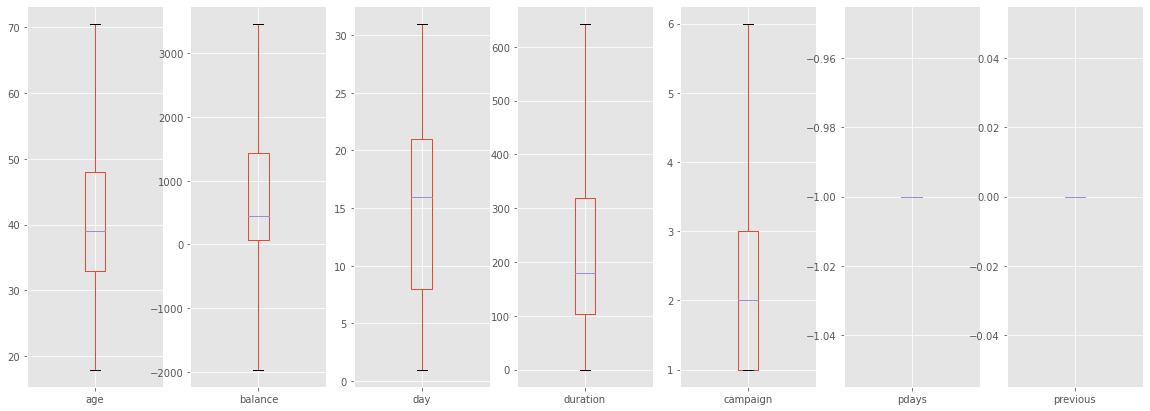

In [12]:
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [13]:
# After the outlier treatment, we have almost reduced data pollution.

In [14]:
# Multi variate Analysis


In [15]:
def do_Target_analysis(colname):
    data = pd.crosstab(DF[colname],DF["Target"])
    print("\nAnalyse %s category for Target" %(colname))
    print(data)

In [16]:
# analysing distribution of categorical feature w.r.t Target

do_Target_analysis("job")
do_Target_analysis("marital")
do_Target_analysis("education")
do_Target_analysis("default")
do_Target_analysis("housing")
do_Target_analysis("loan")


Analyse job category for Target
Target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Analyse marital category for Target
Target       no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

Analyse education category for Target
Target        no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252

Analyse default category for Target
Target      no   yes
default             
no       39159  5237
yes        763    52

Analyse housing category for Target
Target      no   yes
housing             
no       16727  3354
yes      23195  1935

Analyse loan category for Target
Tar

In [17]:
# People who are in management job has high percentage for Target 🎯 Customers.
# People who are married has high percentage for Target 🎯 customers.
# people who has qualification of secondary and tertiary has high percentage for Target 🎯 customers.
# people who has no default has high percentage for Target 🎯 customers.
# people who do not have housing loan has high percentage for Target 🎯 customers.
# people who do not have Personal loan has high percentage for Target 🎯 customers.

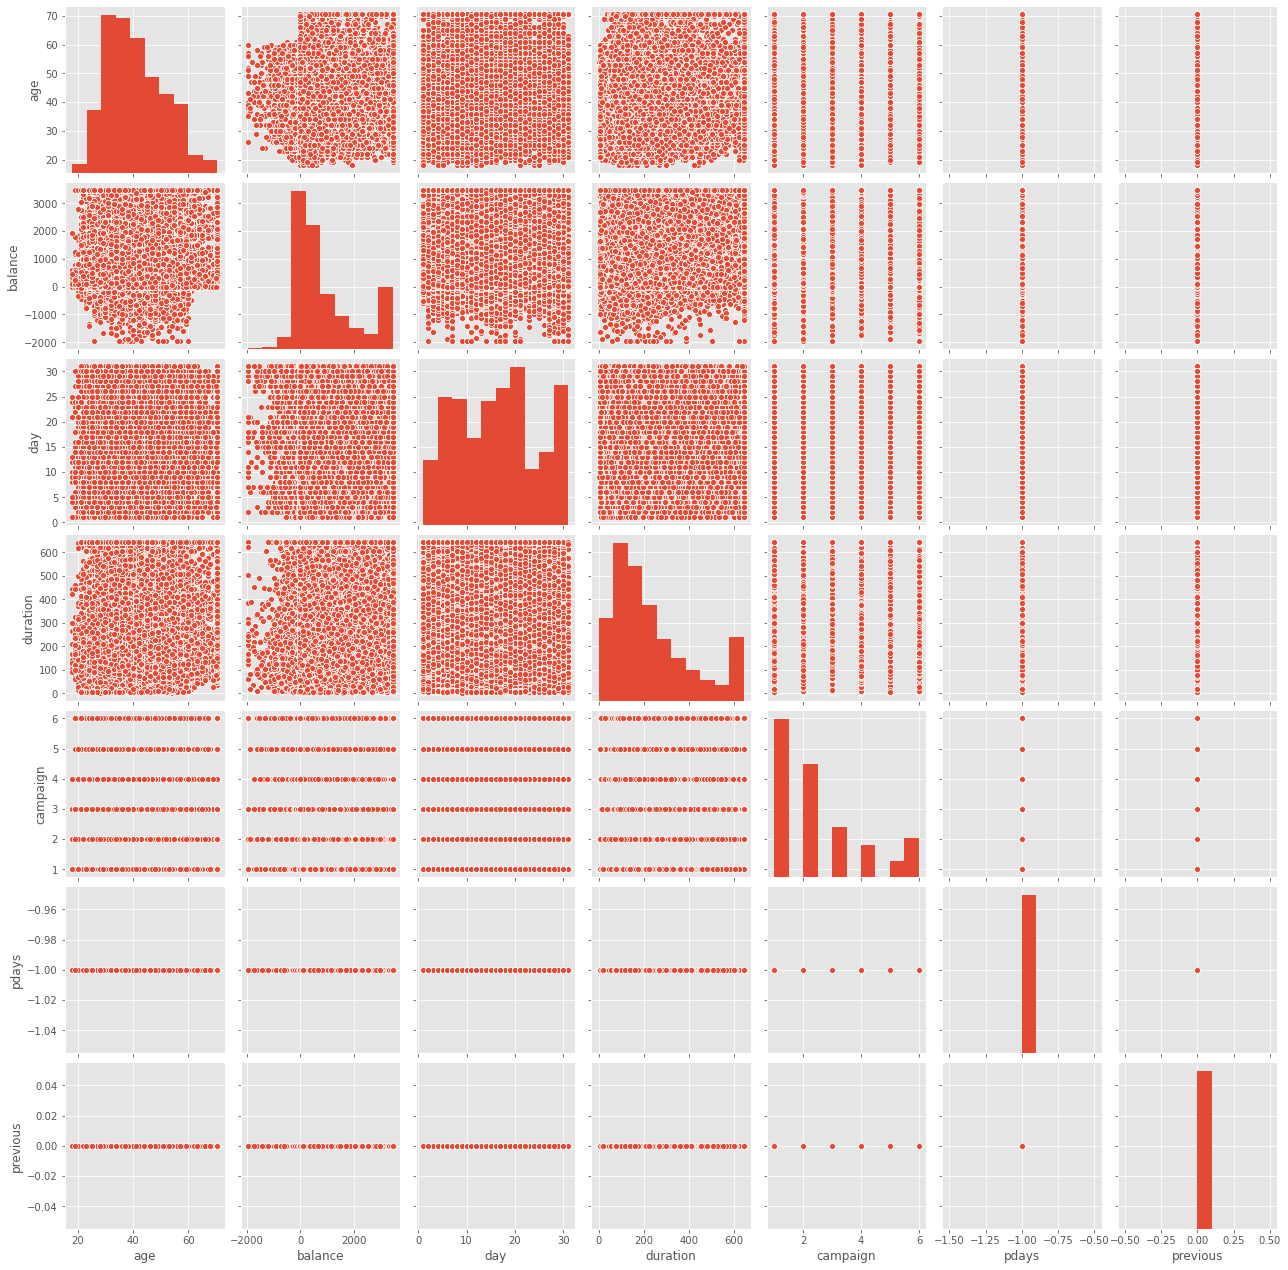

In [18]:

%matplotlib inline
sns.pairplot(DF)

In [19]:
# After the detailed analysis pdays and previous columns as they will not useful for predicting whether the customer will deposit or not.


DF.drop(['pdays','previous'], axis=1, inplace = True)

In [20]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

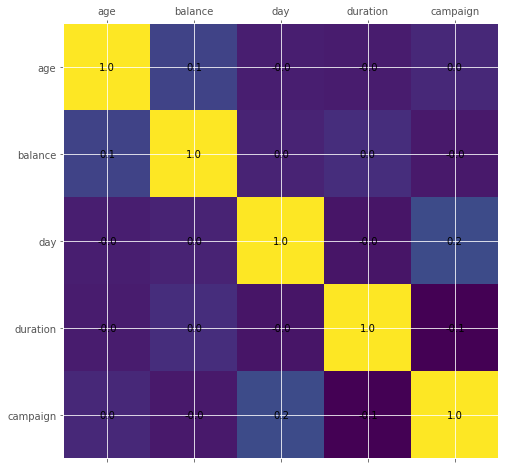

In [21]:
plot_corr(DF)

####  2 . Deliverable –2 (Preparing the Data for Analytics)

In [22]:
DF['marital'] = DF['marital'].astype('category')
DF['education'] = DF['education'].astype('category')
DF['default'] = DF['default'].astype('category')
DF['housing'] = DF['housing'].astype('category')
DF['loan'] = DF['loan'].astype('category')
DF['job'] = DF['job'].astype('category')
DF['Target'] = DF['Target'].astype('category')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  poutcome   45211 non-null  object  
 14  Target     45211 non-null  category
dtypes: category(7), float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [23]:
# Value counts of all categorical columns

#'job', 'marital', 'education', 'default', 'housing', 'loan', 'Target'

for i in list(DF.columns[DF.dtypes=='category']):   # checking value counts of all object type columns
    print(DF[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

no     39922
yes     5289
Name: Target, dtype: int64



In [24]:
# 27214 peolple are married, 12790 people are single and 5207 people are divorced.
# 23202 people has secondary education, 13301 people has tertiary education and 6851 people has primary education.
# 44396 people with no default
# 25130 people has housing loan and 20081 people do not have housing loan.
# 37967 people has personal loan and 7244 people do not have personal loan.

In [25]:
def category_distribution(colname):
    col_data = DF[colname].value_counts().to_frame()
    col_data.reset_index(inplace=True)
    col_data.columns = [col_data.columns[1], 'count']
    col_data['pernt'] = col_data['count'] / sum(col_data['count'])
    print("\n % Distribution for: ",colname)
    print(col_data)

In [26]:
# analysising Percentage % distribution of categorical columns

#'job', 'marital', 'education', 'default', 'housing', 'loan'

category_distribution("job")
category_distribution("marital")
category_distribution("education")
category_distribution("default")
category_distribution("housing")
category_distribution("loan")


 % Distribution for:  job
              job  count  pernt
0     blue-collar   9732   0.22
1      management   9458   0.21
2      technician   7597   0.17
3          admin.   5171   0.11
4        services   4154   0.09
5         retired   2264   0.05
6   self-employed   1579   0.03
7    entrepreneur   1487   0.03
8      unemployed   1303   0.03
9       housemaid   1240   0.03
10        student    938   0.02
11        unknown    288   0.01

 % Distribution for:  marital
    marital  count  pernt
0   married  27214   0.60
1    single  12790   0.28
2  divorced   5207   0.12

 % Distribution for:  education
   education  count  pernt
0  secondary  23202   0.51
1   tertiary  13301   0.29
2    primary   6851   0.15
3    unknown   1857   0.04

 % Distribution for:  default
  default  count  pernt
0      no  44396   0.98
1     yes    815   0.02

 % Distribution for:  housing
  housing  count  pernt
0     yes  25130   0.56
1      no  20081   0.44

 % Distribution for:  loan
  loan  count  pernt

In [27]:
# After Detail Analysis we can drop 'contact', 'day', 'month','poutcome' and 'duration' columns
# As above mentioned columns will not required for predicting the customer will deposit(term) or not.

DF.drop(['contact','day','month','poutcome','duration'], axis=1, inplace = True)

Creating the training set and test set in ratioof 70:30

In [28]:
## Define X and Y variables
X = DF.drop('Target', axis=1)
Y = DF[['Target']]

In [29]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [30]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

lets check split of the data

In [31]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(DF.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(DF.index)) * 100))

70.00% data is in training set
30.00% data is in test set


####  3 . Deliverable – 3 (creating the ensemble model)

Using Logistic Regression model and Decision Tree model to predict the number of customers who will deposit in a bank for particular term. Printing all the metrics related for evaluating the model performance

In [32]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_predict = logreg.predict(X_test)

In [34]:
confusion_matrix(y_test, y_predict)

array([[12013,     0],
       [ 1551,     0]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report


acc_LR = accuracy_score(y_test, y_predict)
print('Logistic Regression Classification Report')
print(classification_report(y_test, y_predict))


Logistic Regression Classification Report
              precision    recall  f1-score   support

          no       0.89      1.00      0.94     12013
         yes       0.00      0.00      0.00      1551

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564



In [36]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR})

resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Logistic Regression,0.89


Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [37]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [38]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print the accuracy of the model & print the confusion matrix

In [39]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 0.99
Test: 0.82


There is a degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.¶

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

In [41]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.88
Test: 0.89


Visualizing the tree¶

In [43]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

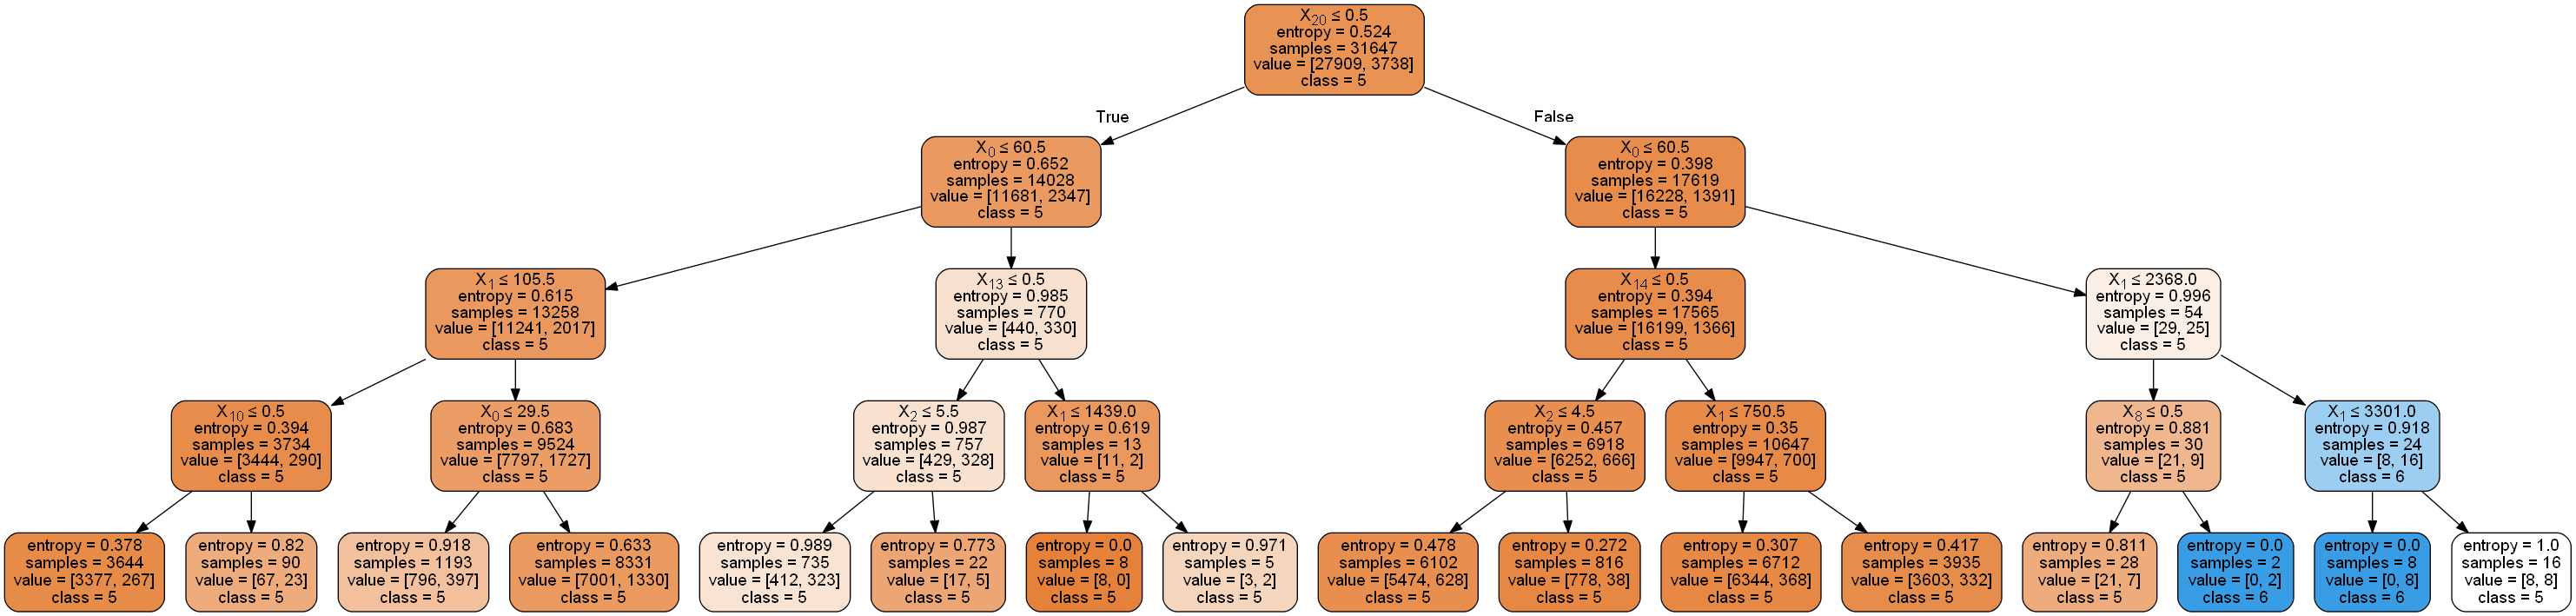

In [44]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['5','6','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Target.png')
Image(graph.create_png())

In [45]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

Decision tree performance

In [46]:
# Confusion matrix
confusion_matrix(y_test, preds_test)

array([[12013,     0],
       [ 1547,     4]], dtype=int64)

In [47]:
print('Decision Tree Classification Report')
print(classification_report(y_test, preds_test))

Decision Tree Classification Report
              precision    recall  f1-score   support

          no       0.89      1.00      0.94     12013
         yes       1.00      0.00      0.01      1551

    accuracy                           0.89     13564
   macro avg       0.94      0.50      0.47     13564
weighted avg       0.90      0.89      0.83     13564



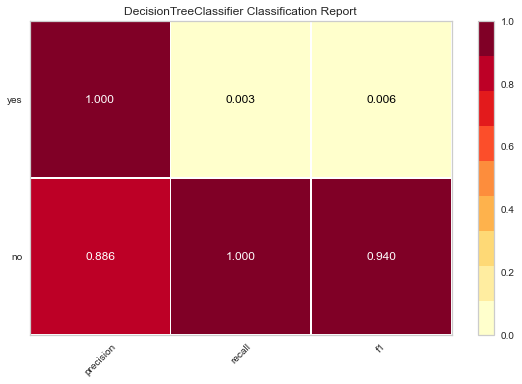

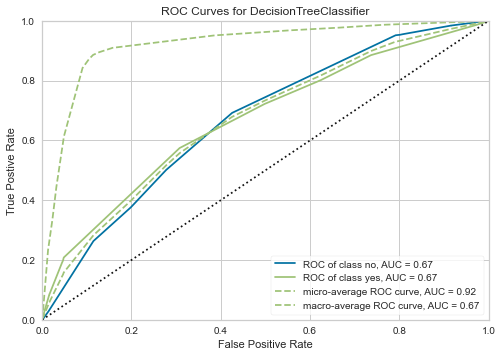

In [48]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

acc_DT = accuracy_score(y_test,preds_test)

In [49]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})

resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Decision Tree,0.89


In [50]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [acc_LR]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.89
0,Logistic Regression,0.89


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [52]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [53]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.89
0,Logistic Regression,0.89
0,Random Forest,0.87


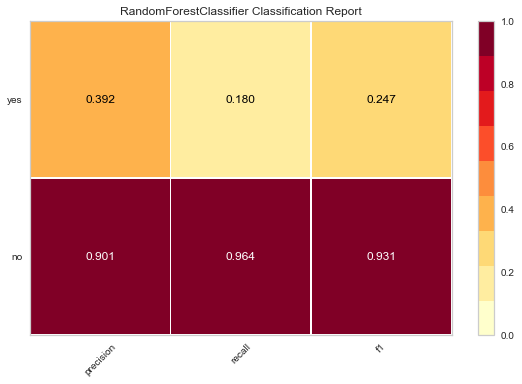

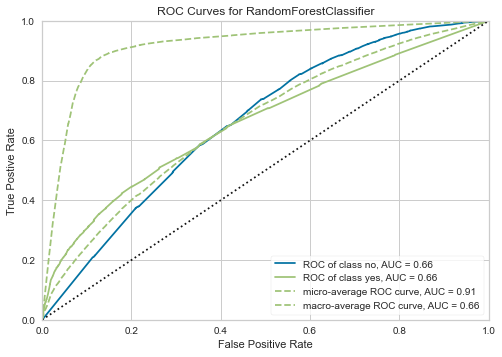

In [54]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Compared to the Random Forest, we can see that the accuracy has same for both Logistic Regression and Decision Tree Models.

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

n_estimators: The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.  
learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and
n_estimators.This parameter controls how much I'm going to contribute with the new model to the existing one


In [55]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [56]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [57]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.89
0,Logistic Regression,0.89
0,Random Forest,0.87
0,Adaboost,0.89


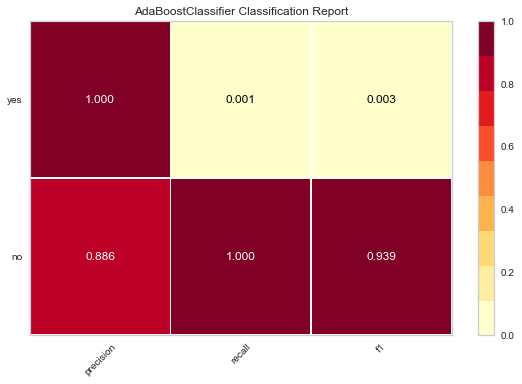

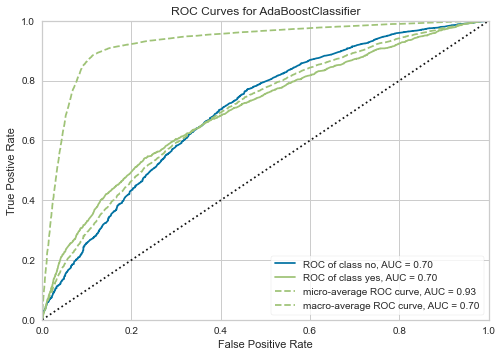

In [58]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Applying Bagging Classifier Algorithm and printing the accuracy.

n_estimators: The number of base estimators in the ensemble  
max_samples: sample size to be used while bootstraping  
oob_score: Whether to use out-of-bag samples to estimate the generalization error.  

In [59]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [60]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [61]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.89
0,Logistic Regression,0.89
0,Random Forest,0.87
0,Adaboost,0.89
0,Bagging,0.88


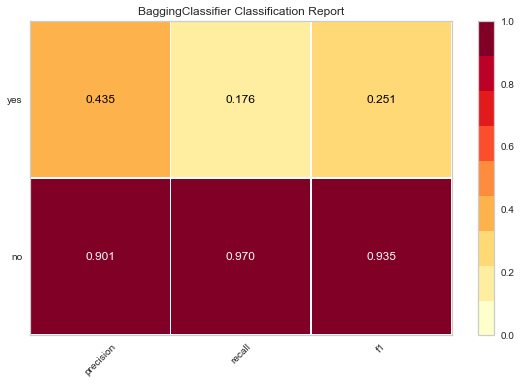

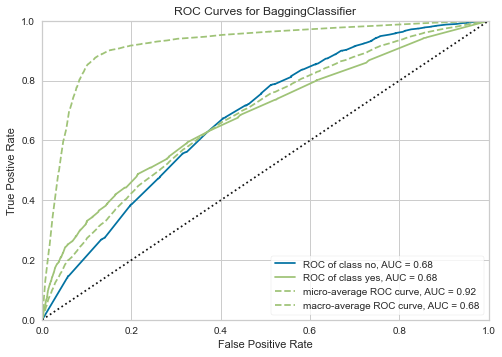

In [62]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [64]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [65]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.89
0,Logistic Regression,0.89
0,Random Forest,0.87
0,Adaboost,0.89
0,Bagging,0.88
0,Gradient Boost,0.89


In [66]:
#For this dataset, Logistic Regression, Decision Tree and boosting models give the best results on test predictions

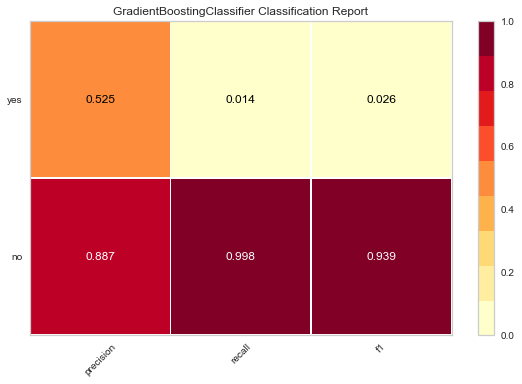

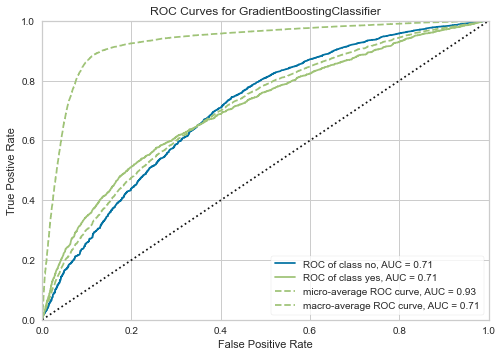

In [67]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [68]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

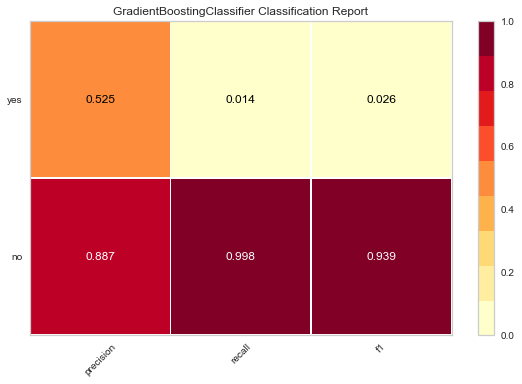

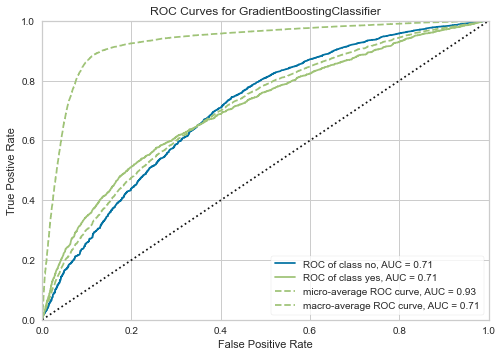

In [69]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

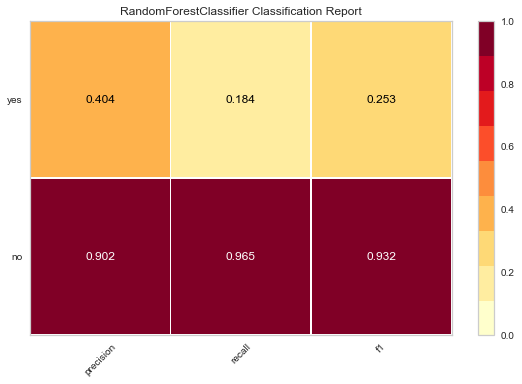

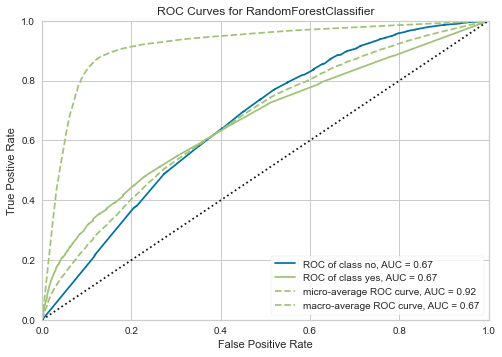

In [70]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))

#### For this dataset, Logistic Regression, Decision Tree and boosting models give the best results on test predictions

In [73]:
# for Data Models like Logistic Regression, Decision Tree have accuracy aof 0.89.
# Boosting methods of ensemble techniques too have accuracy of 0.89
# Random Forest and Bagging methods have accuracy of 0.87 0.88 respectively.
# For this Dataset, Logistic Regression, Decision Tree and Boosting models give the best reults on test predictions.

In [72]:
# Finally we can say that Logistic Regression, Decision tree and Boosting Methods are the best models 
#to predict the number of customer who can deposit in a bank for particular term.
# This prediction can help marketing people in order to grow their respective Business